In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

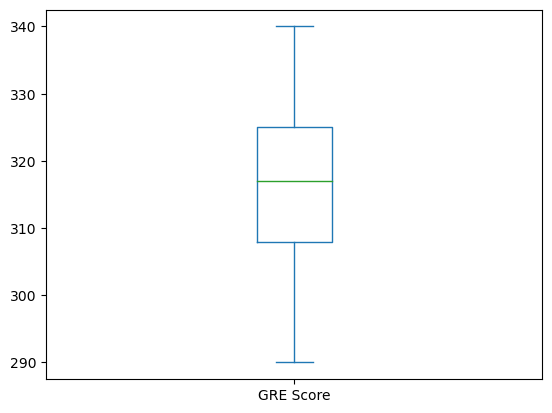

In [7]:
data["GRE Score"].plot.box()

In [8]:
def box_plot(col):
    plt.figure()
    data[col].plot(kind="box")
    plt.title(f"Box Plot Of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

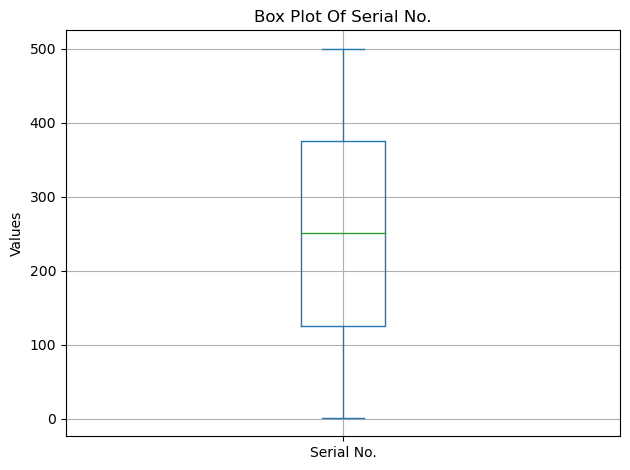

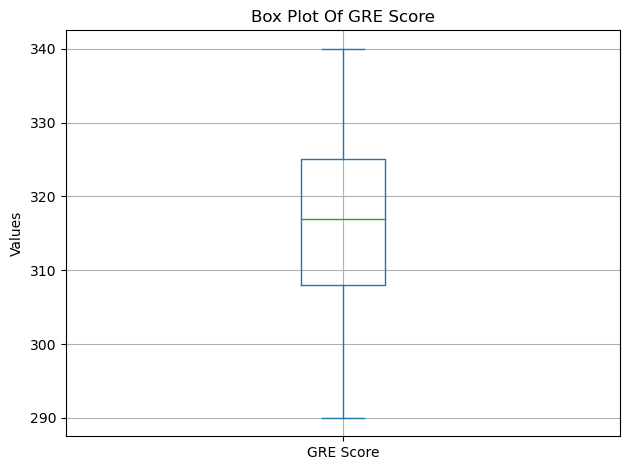

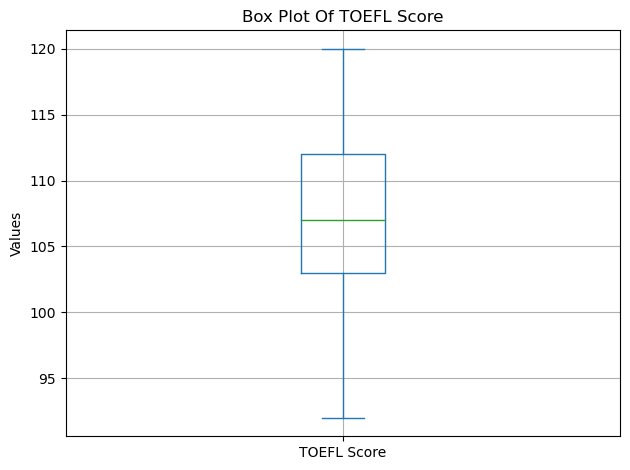

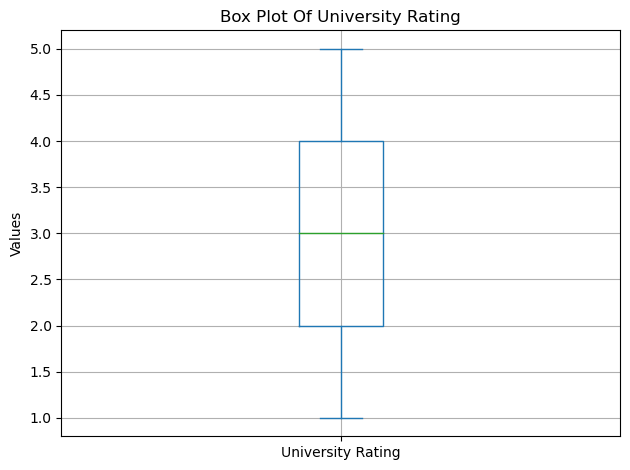

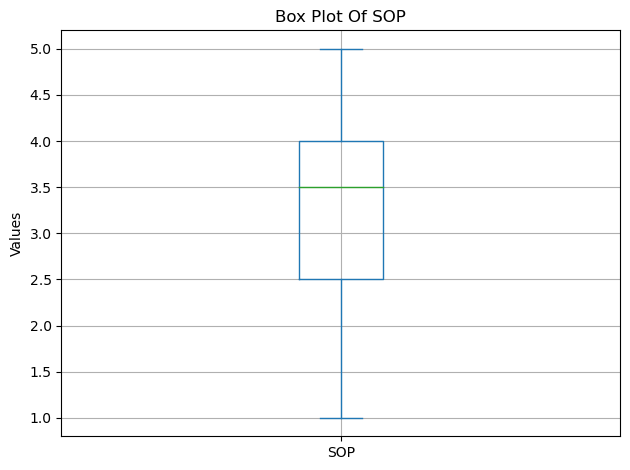

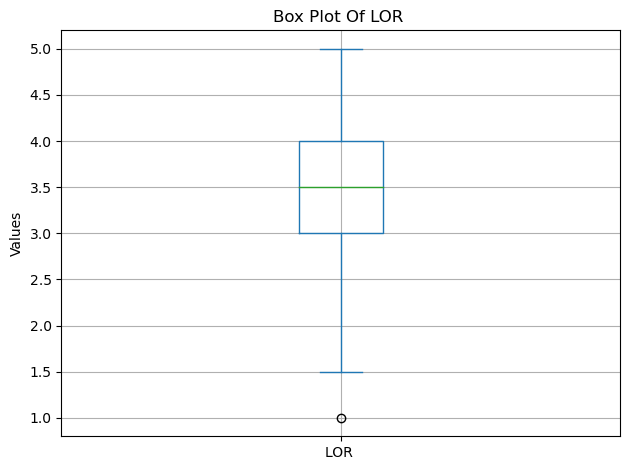

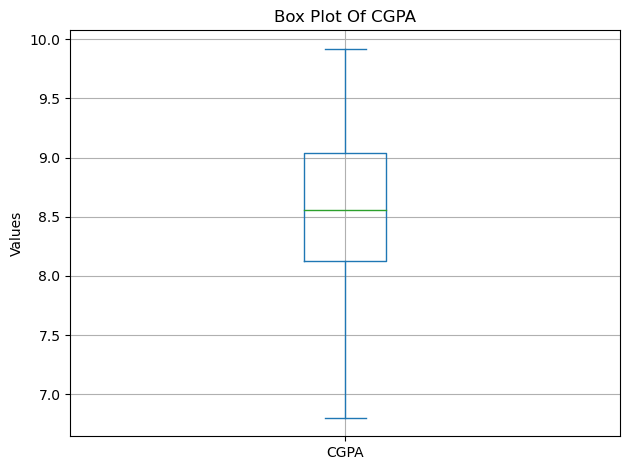

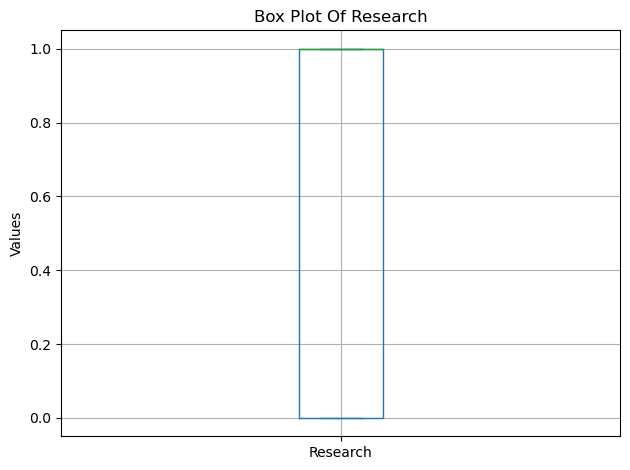

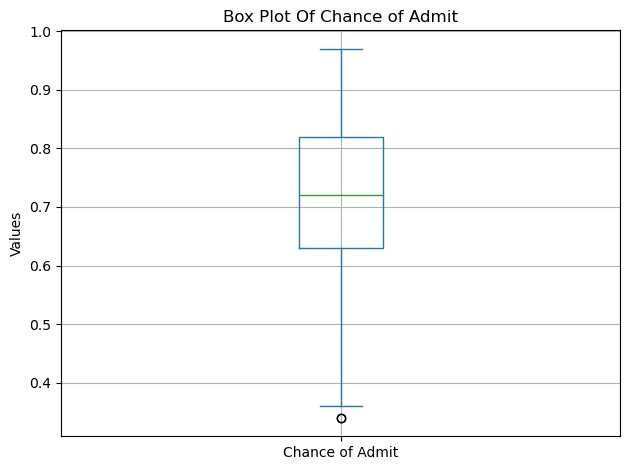

In [9]:
for col in data.columns:
        box_plot(col)

In [10]:
def bar_plot():
    plt.figure()
    data["University Rating"].value_counts().plot(kind="bar")
    plt.title(f"Box Plot Of University Rating")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

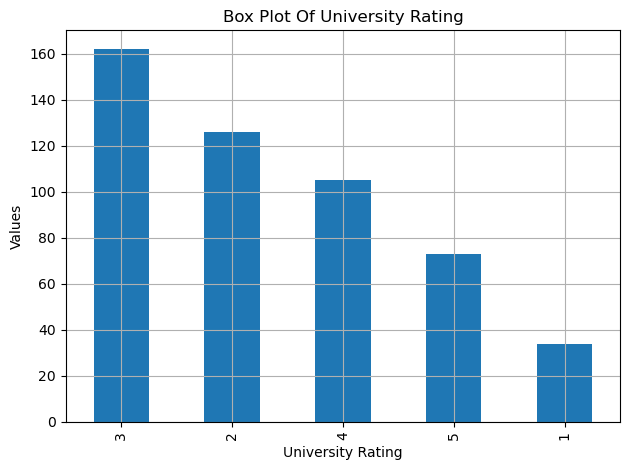

In [11]:
bar_plot()

In [12]:
def bar_plot(col):
    plt.figure()
    data[col].value_counts().plot(kind="bar",rot=90)
    plt.title(f"Bar Plot Of {col}")
    plt.xticks(fontsize=8)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

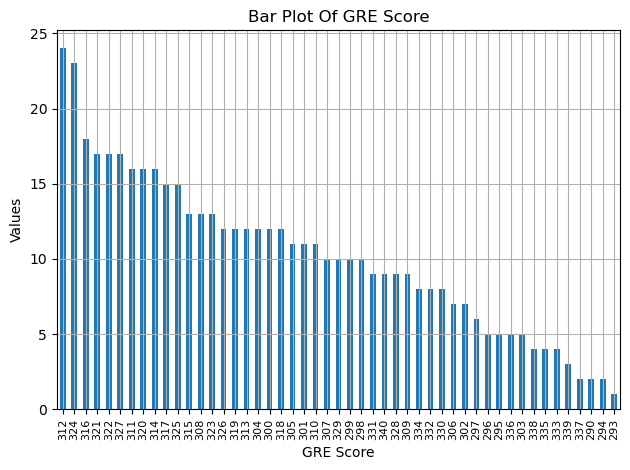

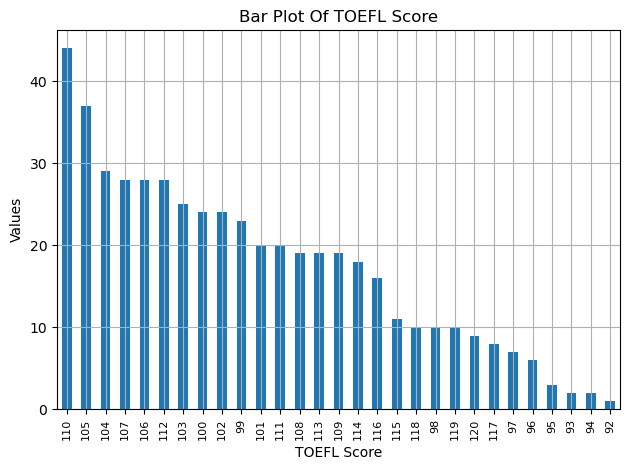

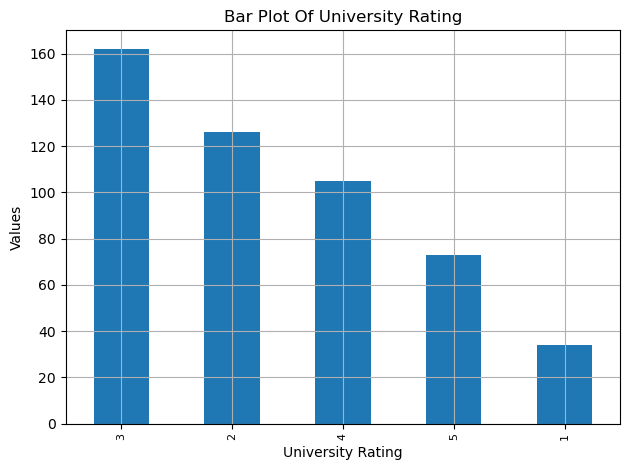

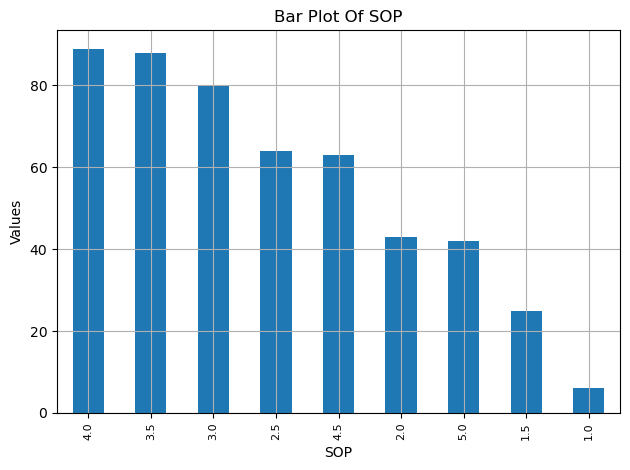

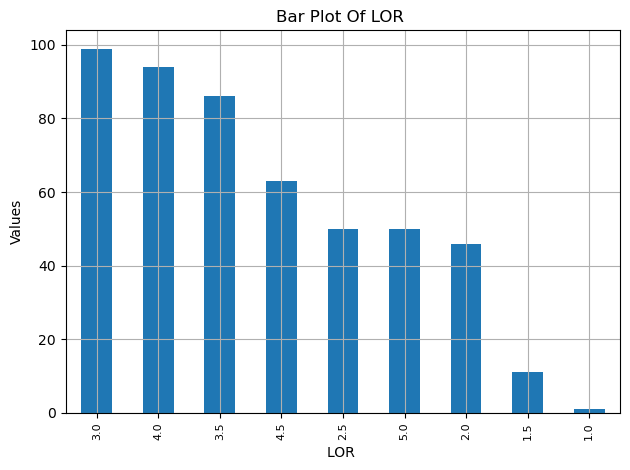

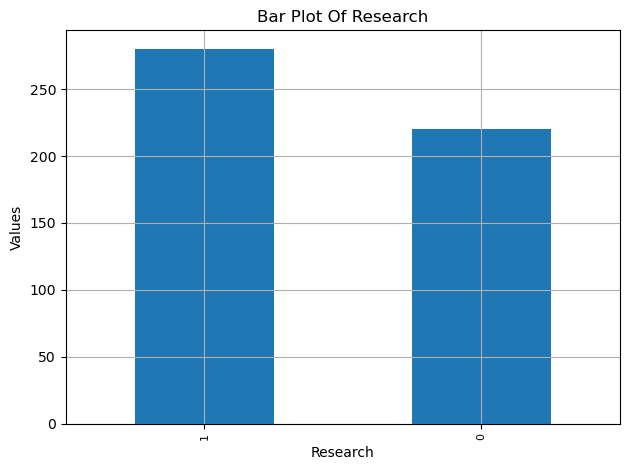

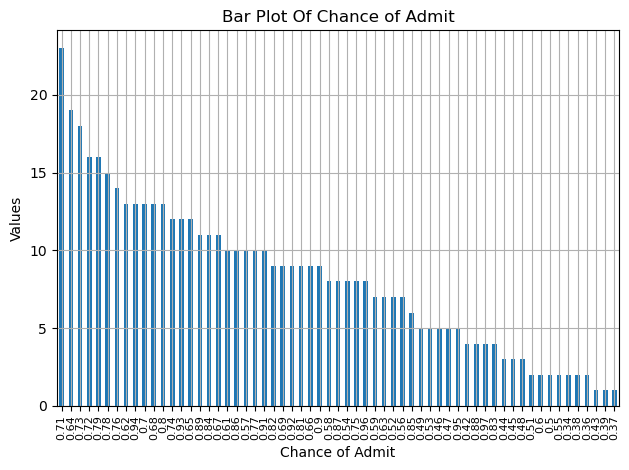

In [13]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'Research', 'Chance of Admit']:
    bar_plot(col)

In [14]:
def line_plot(col):
    plt.figure()
    data[col].value_counts().plot(kind="line",rot=90)
    plt.title(f"Line Plot Of {col}")
    plt.xticks(fontsize=8)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

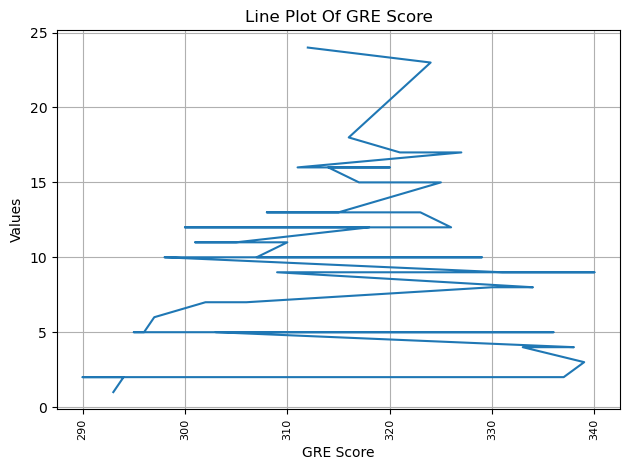

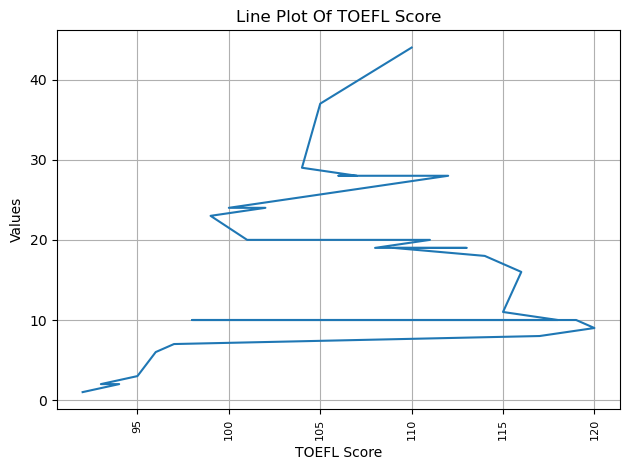

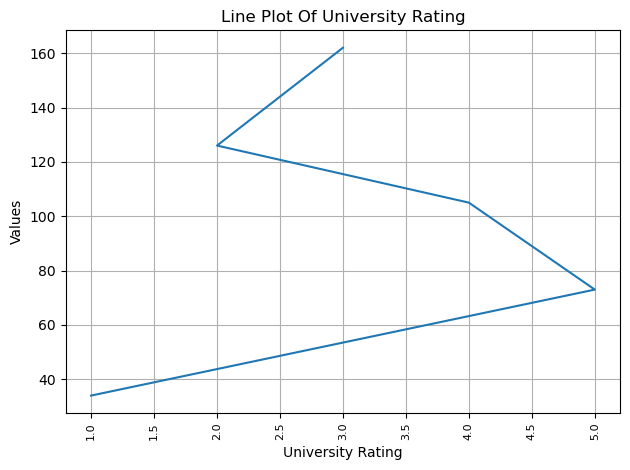

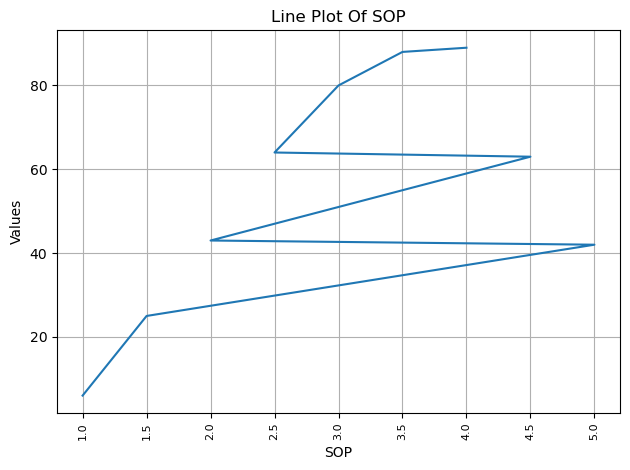

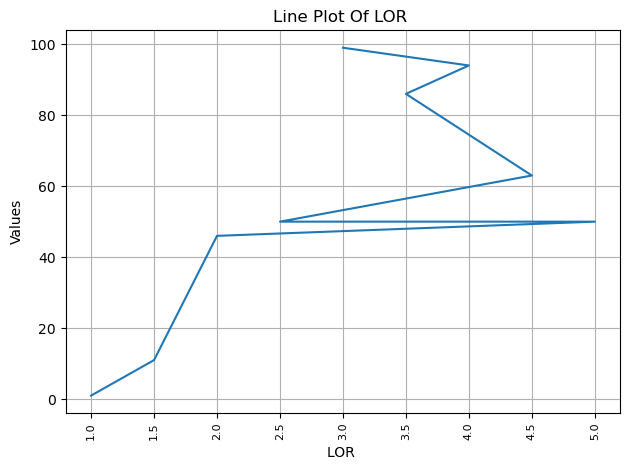

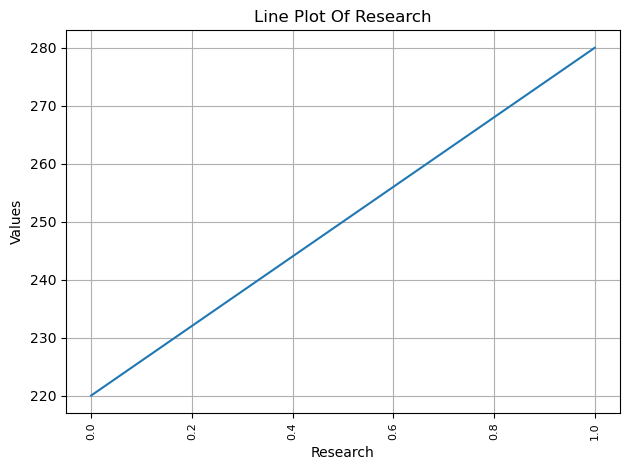

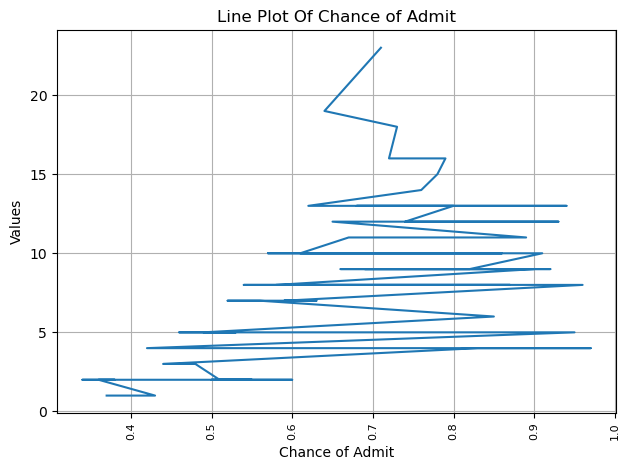

In [15]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'Research', 'Chance of Admit']:
    line_plot(col)

In [16]:
x=data.drop(["Serial No.", "Chance of Admit"],axis=1)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [17]:
y=data["Chance of Admit"]
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

x_train (375, 7)
y_train (375,)
x_test (125, 7)
y_test (125,)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [21]:
select_models=[LinearRegression(),
              DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
              RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)]

In [22]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Squared value {my_r_square} of model {model}")
    print(f"List of Rmse {my_rmse}")
    print("-------------------------------------------------------------------------------------------------------------------")
    print(f"List of R Square {my_r_square}")
    adj_r_squared_test= 1-(1-r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r_squared_test")
    adj_r2_square_value.append(adj_r_squared_test)
    print(f"Adjusted R Square {adj_r2_square_value} of model {model}")
    print("-------------------------------------------------------------------------------------------------------------------")
    print(f"Adjusted R Square {adj_r2_square_value}")   

RMSE value [0.06338978968514869] and R Squared value [0.7718422545814294] of model LinearRegression()
List of Rmse [0.06338978968514869]
-------------------------------------------------------------------------------------------------------------------
List of R Square [0.7718422545814294]
LinearRegression(),adj_r_squared_test
Adjusted R Square [0.7581917911803183] of model LinearRegression()
-------------------------------------------------------------------------------------------------------------------
Adjusted R Square [0.7581917911803183]
RMSE value [0.06338978968514869, 0.07538630143762488] and R Squared value [0.7718422545814294, 0.688888334102141] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.06338978968514869, 0.07538630143762488]
-------------------------------------------------------------------------------------------------------------------
List of R Square [0.7718422545814294, 0.688888334102141]
DecisionTreeRegressor(min_samples_

In [23]:
result=[my_rmse,my_r_square,adj_r2_square_value]
result

[[0.06338978968514869, 0.07538630143762488, 0.0649615980988185],
 [0.7718422545814294, 0.688888334102141, 0.7510860783246487],
 [0.7581917911803183, 0.6702748156296194, 0.7361937924124482]]

In [24]:
a=pd.DataFrame(data=result,columns=["LinearRegression","DecisionTree","RandomForest"],index=["my_rmse","my_r_square","adj_r2_square_value"])

In [25]:
a

,LinearRegression,DecisionTree,RandomForest
my_rmse,0.063390,0.075386,0.064962
my_r_square,0.771842,0.688888,0.751086
adj_r2_square_value,0.758192,0.670275,0.736194


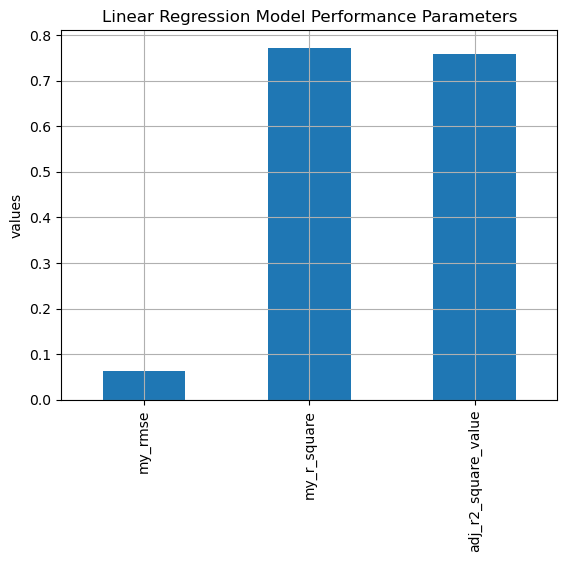

In [26]:
a.LinearRegression.plot(kind="bar")
plt.title("Linear Regression Model Performance Parameters")
plt.ylabel("values")
plt.grid(True)

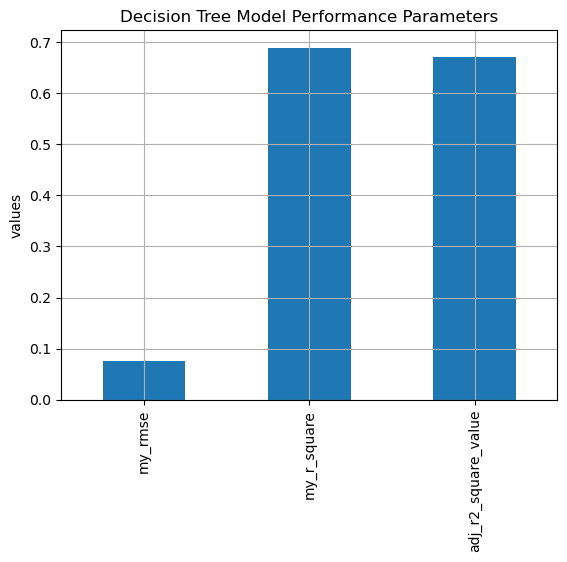

In [27]:
a.DecisionTree.plot(kind="bar")
plt.title("Decision Tree Model Performance Parameters")
plt.ylabel("values")
plt.grid(True)

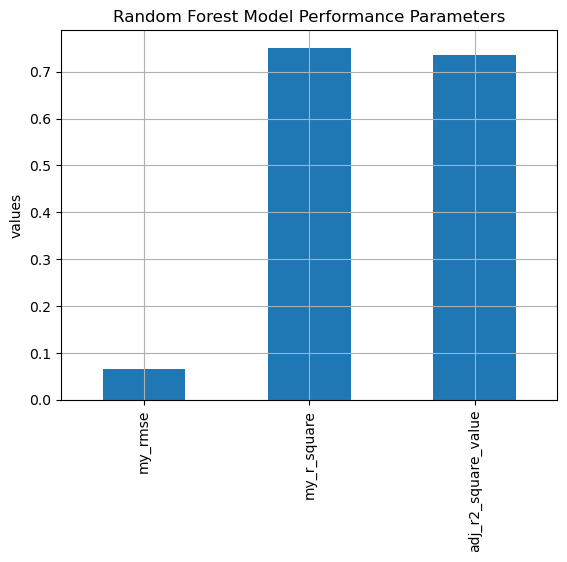

In [28]:
a.RandomForest.plot(kind="bar")
plt.title("Random Forest Model Performance Parameters")
plt.ylabel("values")
plt.grid(True)

In [29]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f"Bar Plot Of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

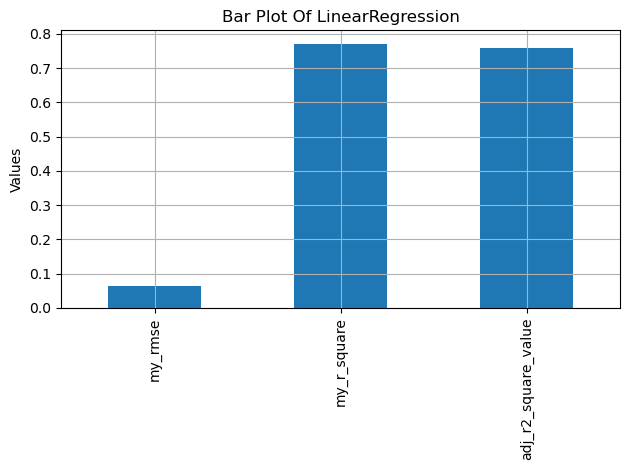

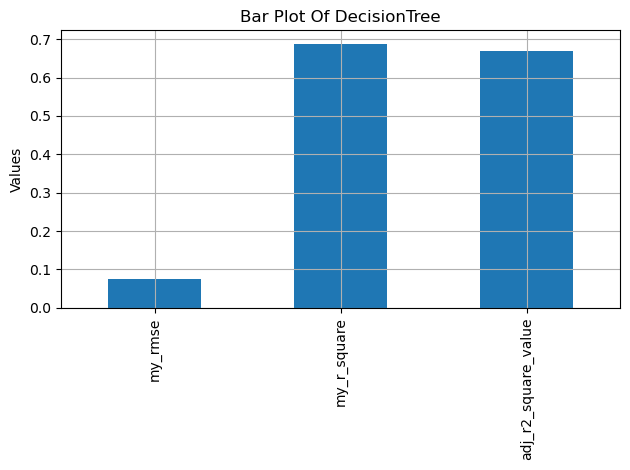

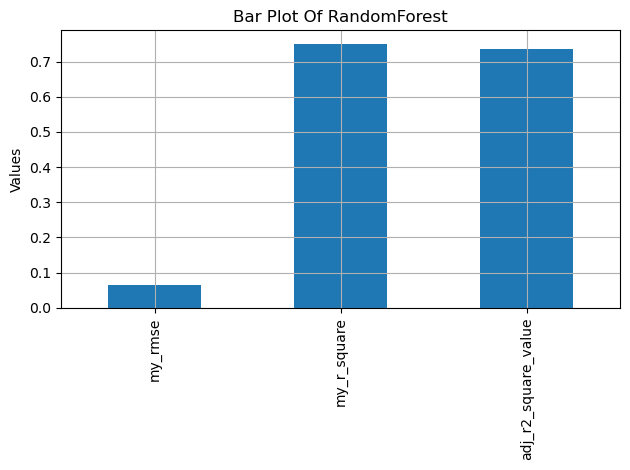

In [30]:
for col in a.columns:
    my_model_plot(col)